# 1x1 Dataset Demo
***

## Initialization
***

In [5]:
# Import necessary libraries
import sys
import os

from notscared import snr
from notscared.data import trace_handler_advanced as trace_handler
from notscared import cpa
import time
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Establish file name make sure that the file you wish to choose is in the same directory as your script
db_file = '1x1x100000_r1_singlerail5_sr_ise.zarr'
proj_root = os.getcwd()
file_name = os.path.join(proj_root, db_file)
print(file_name)

c:\Users\Jonah\Documents\GitHub\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise.zarr


## General SNR
***

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]


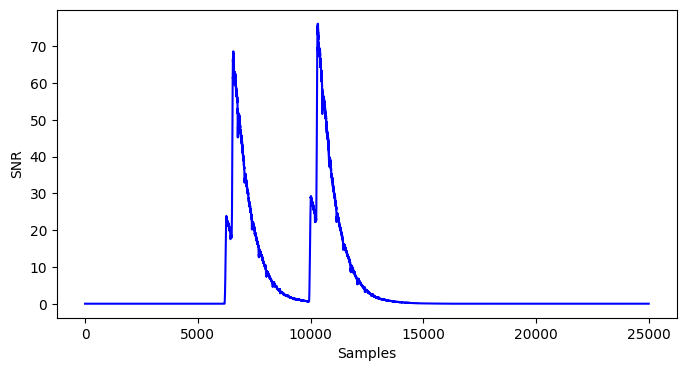

In [7]:
#Declare trace_handler object configuring what file you would like to open (listed above) preferred batch size (recommended 5k) and what trace you would like to start on (75k for this dataset)
handler = trace_handler.TraceHandler(fileName = file_name,
                                     batchSize = 5000,
                                     batchStart = 75001)

#Declare SNR object passing in the trace handler the byte positions (0-15) you would like to compute
algorithm = snr.SNR(Tracehandler = handler,
                    Bytes = [0])

#Call .run() on the algorithm to start the computation
algorithm.run()

#If using pyplot to plot results declare your figure
fig, ax = plt.subplots(figsize=(8, 4))

#Plot the results of running your computation
ax.plot(algorithm.results[0], 'blue')

#Label Your axes
plt.ylabel("SNR")
plt.xlabel("Samples")

#Display the plot
plt.show()

### You can also do multiple byte positions at one time

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise.zarr
Computing SNR: Tiles:  False  Bytes:  [0, 1, 15]


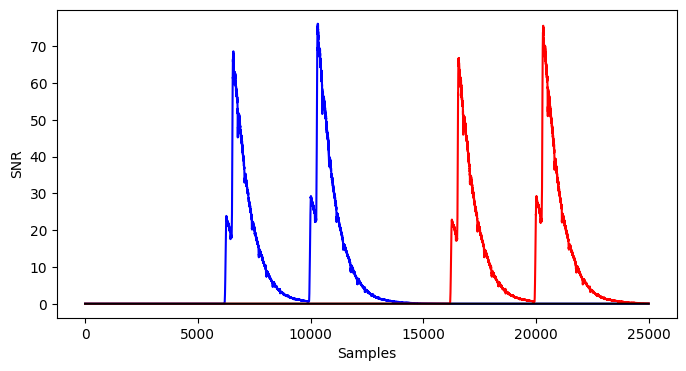

In [5]:
#Declare trace_handler object configuring what file you would like to open (listed above) preferred batch size (recommended 5k) and what trace you would like to start on (75k for this dataset)
handler = trace_handler.TraceHandler(fileName = file_name,
                                     batchSize = 5000,
                                     batchStart = 75001)

#Declare SNR object passing in the trace handler the byte positions (0-15) you would like to compute
algorithm = snr.SNR(Tracehandler = handler,
                    Bytes = [0,1,15])

#Call .run() on the algorithm to start the computation
algorithm.run()

#If using pyplot to plot results declare your figure
fig, ax = plt.subplots(figsize=(8, 4))

#Plot the results of running your computation
ax.plot(algorithm.results[0], 'blue')
ax.plot(algorithm.results[1], 'red')
ax.plot(algorithm.results[2], 'black')

#Label Your axes
plt.ylabel("SNR")
plt.xlabel("Samples")

#Display the plot
plt.show()

## General CPA
***

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise.zarr
Computing CPA: Tiles:  False  Bytes:  [0]
(109, 6289)


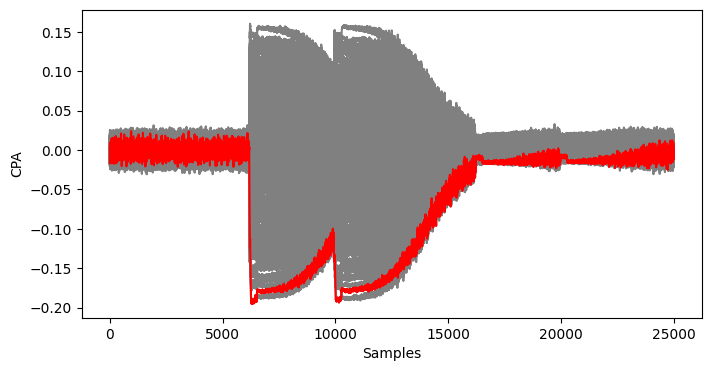

In [6]:
#Declare trace_handler object configuring what file you would like to open (listed above) preferred batch size (recommended 5k) and what trace you would like to start on (75k for this dataset)
handler = trace_handler.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001)

#Declare SNR object passing in the trace handler the byte positions (0-15) you would like to compute
algorithm = cpa.CPA(Tracehandler = handler,
                 Bytes = [0],)

#Call .run() on the algorithm to start the computation
algorithm.run()

#To select the hypothesized key index that the algorithm has selected you must use numpy to find the index of the highest absolute correlation value
key_index = np.unravel_index(np.abs(algorithm.results[0, :, :]).argmax(), algorithm.results.shape[1:])

#found index
print(key_index)

#If using pyplot to plot results declare your figure
fig, ax = plt.subplots(figsize=(8, 4))

#Plot the results of running your computation gray for all key candidates and red for the hypothesized key candidate
ax.plot(algorithm.results[0, :, :].T, 'gray')
ax.plot(algorithm.results[0, key_index[0], :], 'red')

#Label Your axes
plt.ylabel("CPA")
plt.xlabel("Samples")

#Display the plot
plt.show()

### You can also do multiple byte position at one time

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise.zarr
Computing CPA: Tiles:  False  Bytes:  [0, 15]
(109, 6289)


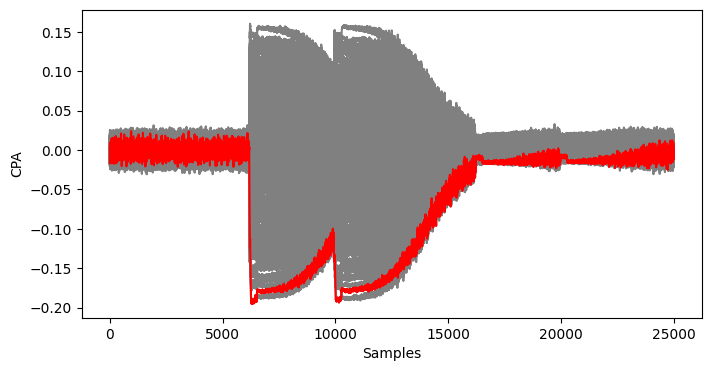

(153, 14043)


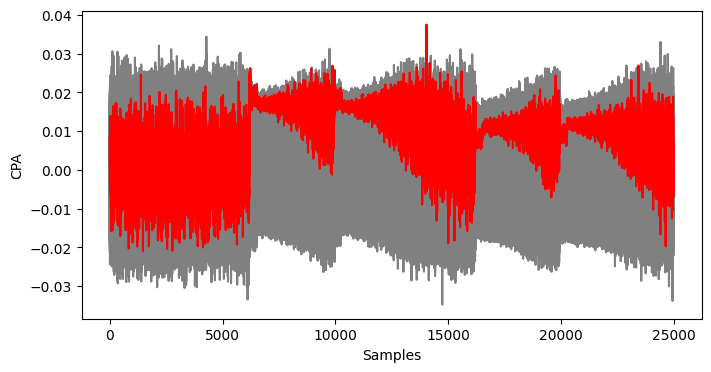

In [7]:
#Declare trace_handler object configuring what file you would like to open (listed above) preferred batch size (recommended 5k) and what trace you would like to start on (75k for this dataset)
handler = trace_handler.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001)

#Declare SNR object passing in the trace handler the byte positions (0-15) you would like to compute
algorithm = cpa.CPA(Tracehandler = handler,
                 Bytes = [0,15],)

#Call .run() on the algorithm to start the computation
algorithm.run()

#Plot for Byte index 1
#To select the hypothesized key index that the algorithm has selected you must use numpy to find the index of the highest absolute correlation value
key_index = np.unravel_index(np.abs(algorithm.results[0, :, :]).argmax(), algorithm.results.shape[1:])

#found index
print(key_index)

#If using pyplot to plot results declare your figure
fig, ax = plt.subplots(figsize=(8, 4))

#Plot the results of running your computation gray for all key candidates and red for the hypothesized key candidate
ax.plot(algorithm.results[0, :, :].T, 'gray')
ax.plot(algorithm.results[0, key_index[0], :], 'red')

#Label Your axes
plt.ylabel("CPA")
plt.xlabel("Samples")

#Display the plot
plt.show()

#Plot for Byte index 15
#To select the hypothesized key index that the algorithm has selected you must use numpy to find the index of the highest absolute correlation value
key_index = np.unravel_index(np.abs(algorithm.results[1, :, :]).argmax(), algorithm.results.shape[1:])

#found index
print(key_index)

#If using pyplot to plot results declare your figure
fig, ax = plt.subplots(figsize=(8, 4))

#Plot the results of running your computation gray for all key candidates and red for the hypothesized key candidate
ax.plot(algorithm.results[1, :, :].T, 'gray')
ax.plot(algorithm.results[1, key_index[0], :], 'red')

#Label Your axes
plt.ylabel("CPA")
plt.xlabel("Samples")

#Display the plot
plt.show()

## Advanced Indexing
***

### You can also select a time slice of your sample

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise.zarr
1000
Computing SNR: Tiles:  False  Bytes:  [0]


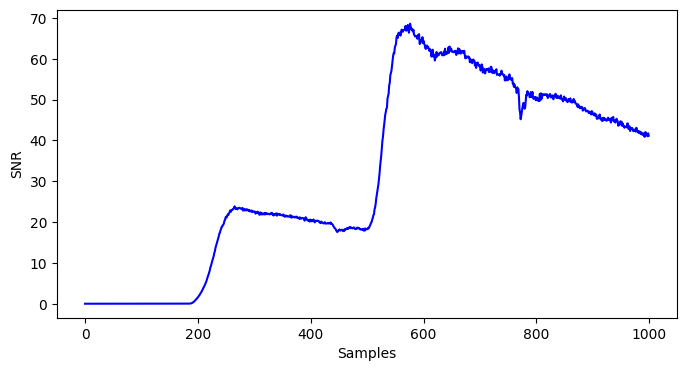

In [8]:
#Declare trace_handler object configuring what file you would like to open (listed above) preferred batch size (recommended 5k) and what trace you would like to start on (75k for this dataset)
#You may also optionally configure the time_slice which is an array of length 2 (start, stop) or of length 3 (start, stop, step)
handler = trace_handler.TraceHandler(fileName = file_name,
                                     batchSize = 5000,
                                     batchStart = 75001,
                                     time_slice = [6000, 7000])

#Declare SNR object passing in the trace handler the byte positions (0-15) you would like to compute
algorithm = snr.SNR(Tracehandler = handler,
                    Bytes = [0])

#Call .run() on the algorithm to start the computation
algorithm.run()

#If using pyplot to plot results declare your figure
fig, ax = plt.subplots(figsize=(8, 4))

#Plot the results of running your computation
ax.plot(algorithm.results[0], 'blue')

#Label Your axes
plt.ylabel("SNR")
plt.xlabel("Samples")

#Display the plot
plt.show()

### Or you could down sample your full data set

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise.zarr
1000
Computing SNR: Tiles:  False  Bytes:  [0, 1, 15]


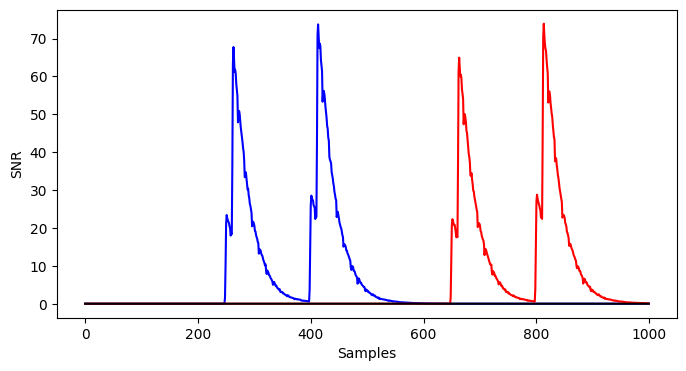

In [10]:
#Declare trace_handler object configuring what file you would like to open (listed above) preferred batch size (recommended 5k) and what trace you would like to start on (75k for this dataset)
#You may also optionally configure the time_slice which is an array of length 2 (start, stop) or of length 3 (start, stop, step)
handler = trace_handler.TraceHandler(fileName = file_name,
                                     batchSize = 5000,
                                     batchStart = 75001,
                                     time_slice = [0, 24998, 25])

#Declare SNR object passing in the trace handler the byte positions (0-15) you would like to compute
algorithm = snr.SNR(Tracehandler = handler,
                    Bytes = [0,1,15])

#Call .run() on the algorithm to start the computation
algorithm.run()

#If using pyplot to plot results declare your figure
fig, ax = plt.subplots(figsize=(8, 4))

#Plot the results of running your computation
ax.plot(algorithm.results[0], 'blue')
ax.plot(algorithm.results[1], 'red')
ax.plot(algorithm.results[2], 'black')

#Label Your axes
plt.ylabel("SNR")
plt.xlabel("Samples")

#Display the plot
plt.show()